__Import the required libraries__

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import scipy
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('EPL_Soccer_MLR_LR.csv')
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


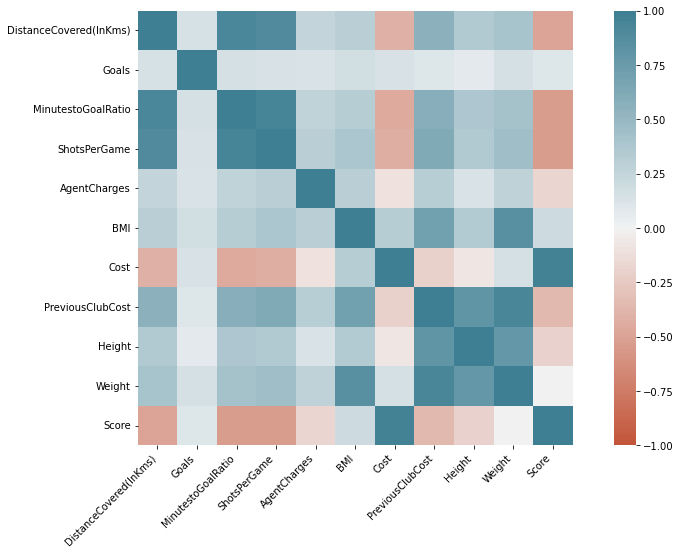

In [9]:
#Colored graph of correlations
plt.figure(figsize=(15,8))
ax = sns.heatmap(
    df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Remove weakly correlated variables
#Weight

#Some highly multicollinear predictors: MinutestoGoalRatio, ShotsPerGame
#Remove MinutestoGoalRatio

#PreviousClubCost, Height, Weight
#Discard height and weight, keep previousclubcost

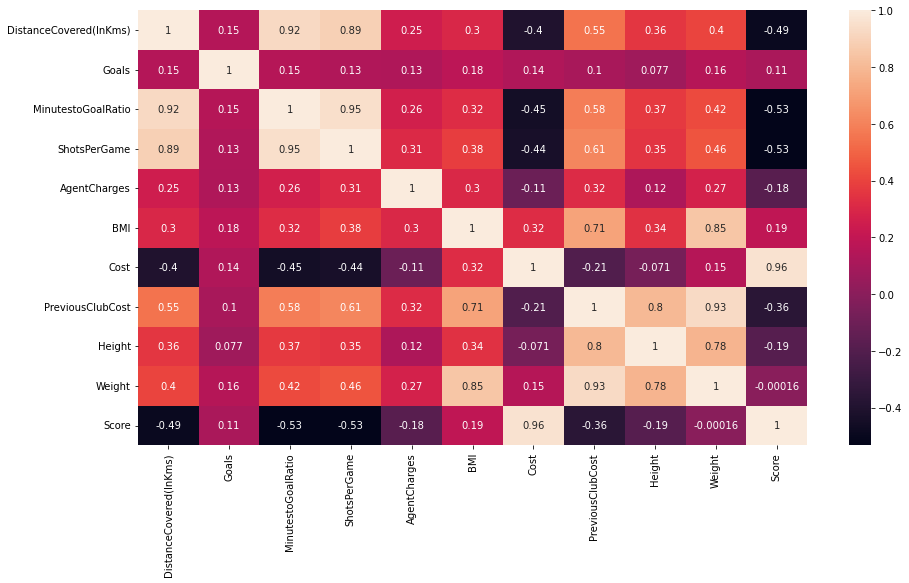

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
#Extract predictor variables (remove categorical variables like team)
X=df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y=df['Score']

In [11]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [12]:
#Fit the linear regression model
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           9.69e-96
Time:                        23:58:36   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2052      1.601      5.750      0.000       6.041      12.370
DistanceCovered(InKms)    -0.6790      0.563     -1.206      0.230      -1.792       0.434
Goals                      0.0279      0.060      0.464      0.643      -0.091       0.147
ShotsPerGame              -0.1151      0.191     -0.601      0.548      -0.493       0.263
AgentCharges              -0.0023      0.002     -0.939      0.349      -0.007       0.003
BMI                        0.1841      0.077      2.386      0.018       0.032       0.337
Cost                       0.1612      0.005     31.297      0.000       0.151       0.171
PreviousClubCost          -0.0953      0.017     -5.772      0.000      -0.128      -0.063
==============================================================================
Omnibus:                        7.786   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.830
Skew:                           0.444   Prob(JB):                       0.0199
Kurtosis:                       3.675   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Can we trim some variables and see how it performs?
X=df[['DistanceCovered(InKms)'
        , 'BMI', 'Cost',
       'PreviousClubCost']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          9.28e-100
Time:                        23:59:09   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2171      1.548      5.955      0.000       6.158      12.276
DistanceCovered(InKms)    -0.9395      0.323     -2.905      0.004      -1.579      -0.300
BMI                        0.1629      0.074      2.200      0.029       0.017       0.309
Cost                       0.1628      0.005     33.617      0.000       0.153       0.172
PreviousClubCost          -0.0961      0.016     -5.861      0.000      -0.129      -0.064
==============================================================================
Omnibus:                        7.362   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.506
Skew:                           0.412   Prob(JB):                       0.0234
Kurtosis:                       3.717   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Let's try throwing in club data using dummy variables
clubs=set(df.Club)
clubs

nominal_features = pd.get_dummies(df['Club'])
nominal_features


,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
197,0,1,0
198,0,1,0
199,0,1,0
200,0,1,0


In [16]:
df_encoded=pd.concat([df,nominal_features], axis=1)
df_encoded

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79,0,1,0
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05,0,1,0
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51,0,1,0
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50,0,1,0


In [17]:
#Run with club encoding
X=df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost','CHE','MUN','LIV']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Sun, 01 Jan 2023   Prob (F-statistic):          1.79e-103
Time:                        00:00:59   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9020      1.180      3.306      0.001       1.569       6.235
DistanceCovered(InKms)    -0.3125      0.316     -0.989      0.324      -0.937       0.312
BMI                        0.2677      0.070      3.826      0.000       0.129       0.406
Cost                       0.1459      0.005     27.435      0.000       0.135       0.156
PreviousClubCost          -0.0984      0.015     -6.578      0.000      -0.128      -0.069
CHE                        0.9915      0.424      2.336      0.021       0.153       1.830
MUN                        2.5777      0.363      7.109      0.000       1.861       3.294
LIV                        0.3328      0.510      0.652      0.515      -0.676       1.341
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.891
Skew:                           0.260   Prob(JB):                        0.389
Kurtosis:                       3.174   Cond. No.                     6.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

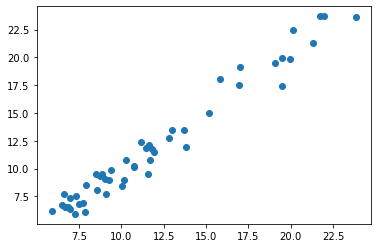

In [18]:
#Look at model plot
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

#plot the scatter plot between the fitted values and actual test values for repsonse variable
plt.scatter(y_test_fitted, y_test)
plt.show()
